In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine,correlation
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
from contextlib import contextmanager
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')
import os, sys
import re
% matplotlib inline

In [262]:
books=pd.read_csv("C:\\Users\\padarsh\\AnacondaProjects\\BX-CSV-Dump\\BX-Books.csv",sep=';',error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [263]:
books.columns=['ISBN','BookTitle', 'BookAuthor','YearOfPublication','Publisher', 'ImageURLS','ImageURLM','ImageURLL']

In [264]:
rating=pd.read_csv('C:\\Users\\padarsh\\AnacondaProjects\\BX-CSV-Dump\\BX-Book-Ratings.csv',sep=';',encoding='latin-1')

In [265]:
rating.columns=['UserID', 'ISBN', 'BookRating']

In [266]:
users=pd.read_csv('C:\\Users\\padarsh\\AnacondaProjects\\BX-CSV-Dump\\BX-Users.csv',sep=';',encoding='latin-1')

In [267]:
users.columns=['UserID','Location','Age']

In [268]:
books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [269]:
books.drop(['ImageURLS','ImageURLM','ImageURLL'],axis=1,inplace=True)

In [270]:
books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [271]:
books.dtypes

ISBN                 object
BookTitle            object
BookAuthor           object
YearOfPublication    object
Publisher            object
dtype: object

In [272]:
books.YearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [273]:
pd.set_option('display.max_colwidth',-1)

In [274]:
books.loc[books.YearOfPublication=='DK Publishing Inc',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [275]:
books.loc[books.ISBN=='078946697X','YearOfPublication']=2000
books.loc[books.ISBN=='078946697X','BookTitle']="DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books.loc[books.ISBN=='078946697X','BookAuthor']="Michael Teitelbaum"
books.loc[books.ISBN=='078946697X','Publisher']= "DK Publishing Inc"

In [276]:
books.loc[books.ISBN=='0789466953','YearOfPublication']=2000
books.loc[books.ISBN=='0789466953','BookTitle']="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[books.ISBN=='0789466953','BookAuthor']="James Buckley"
books.loc[books.ISBN=='0789466953','Publisher']= "DK Publishing Inc"

In [277]:
books.loc[books.YearOfPublication=='Gallimard']

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [278]:
books.loc[books.ISBN=='2070426769','YearOfPublication']=2003
books.loc[books.ISBN=='2070426769','BookTitle']="Peuple du ciel, suivi de 'Les Bergers"
books.loc[books.ISBN=='2070426769','BookAuthor']="Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN=='2070426769','Publisher']= "Gallimard"

In [279]:
books.YearOfPublication=pd.to_numeric(books.YearOfPublication,errors='coerce')

In [280]:
print (sorted(books.YearOfPublication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [281]:
books.loc[(books.YearOfPublication>2006) | (books.YearOfPublication==0),'YearOfPublication']=np.NAN
books.YearOfPublication.fillna(round(np.mean(books.YearOfPublication)),inplace=True)

In [282]:
books.YearOfPublication=books.YearOfPublication.astype(np.int32)

In [283]:
books.loc[books.Publisher.isnull(),:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [284]:
books.loc[books.ISBN=='193169656X','Publisher']='other'
books.loc[books.ISBN=='1931696993','Publisher']='other'

In [285]:
users.head(3)

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [286]:
users.shape

(278858, 3)

In [287]:
users.dtypes

UserID      int64  
Location    object 
Age         float64
dtype: object

In [288]:
users.UserID.unique()

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [289]:
print (sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [290]:
users.loc[(users.Age>90) | (users.Age<5),'Age']=np.NAN
users.Age.fillna(round(np.mean(users.Age)),inplace=True)

In [291]:
users.Age=users.Age.astype(np.int32)

In [292]:
print (sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [293]:
rating.shape

(1149780, 3)

In [294]:
rating.dtypes

UserID        int64 
ISBN          object
BookRating    int64 
dtype: object

In [295]:
rating.head(5)

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [296]:
n_users=users.shape[0]
n_books=books.shape[0]
print (n_users*n_books)

75670906880


In [297]:
rating.shape

(1149780, 3)

In [298]:
ratings_new = rating[rating.ISBN.isin(books.ISBN)]
ratings_new = ratings_new[ratings_new.UserID.isin(users.UserID)]

In [299]:
print (ratings_new.shape)
print (rating.shape)

(1031136, 3)
(1149780, 3)


In [300]:
sparsity = 1.0 - len(ratings_new)/float(n_users*n_books)
print ('Sparsity level of Book crossing dataset is', str(sparsity*100)+' %')

Sparsity level of Book crossing dataset is 99.99863734155898 %


In [301]:
rating.BookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [302]:
rating_explicit = ratings_new[ratings_new.BookRating !=0]
rating_implicit = ratings_new[ratings_new.BookRating == 0]

In [303]:
users_explicit_ratings = users[users.UserID.isin(rating_explicit.UserID)]
users_implicit_ratings = users[users.UserID.isin(rating_implicit.UserID)]

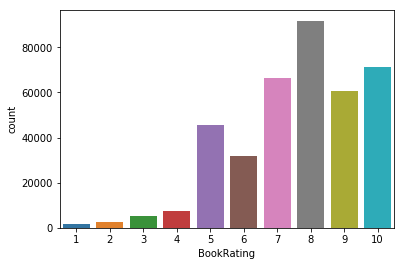

In [304]:
sns.countplot(data=rating_explicit,x=rating_explicit.BookRating)
plt.show()

# # Simple Popularity based Recommendation System

In [305]:
rating_count=pd.DataFrame(rating_explicit.groupby(['ISBN'])['BookRating'].sum())
top10=rating_count.sort_values('BookRating',ascending=False).head(10)
top10.merge(books,left_index=True,right_on='ISBN')

,BookRating,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


# Collaborative Filtering based Recommendation System

      Considering users who have rated at least 100 books and books which have at least 100 ratings.

In [306]:
counts1 = rating_explicit.UserID.value_counts()
rating_explicit=rating_explicit[rating_explicit.UserID.isin(counts1[counts1>100].index)]
counts = rating_explicit.BookRating.value_counts()
rating_explicit=rating_explicit[rating_explicit.BookRating.isin(counts[counts>100].index)]

Next key step in building CF-based recommendation systems is to generate user-item ratings matrix from the ratings table.

In [307]:
rating_matrix=rating_explicit.pivot(index='UserID',columns='ISBN',values='BookRating')
UserID=rating_matrix.index
ISBN=rating_matrix.columns
print (rating_matrix.shape)
rating_matrix.head()

(440, 66076)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
UserID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
rating_matrix.fillna(0, inplace = True)
rating_matrix = rating_matrix.astype(np.int32)

In [309]:
global metric,k
metric='cosine'
k=10

In [342]:
def findKsimilarusers(userid,userItemmatrix,k=k,metric=metric):
    similarities=[]
    indices=[]
    model=NearestNeighbors(metric=metric,algorithm='brute')
    model.fit(userItemmatrix)
    loc=userItemmatrix.index.get_loc(userid)
    distance,indices=model.kneighbors(userItemmatrix.iloc[loc,:].values.reshape(1,-1),n_neighbors= k+1)
    similarities=1 - distance.flatten()
    return similarities,indices

In [343]:
def findKsimilaritems(item_id,userItemmatrix,k=k,metric=metric):
    similarities=[]
    indices=[]
    userItemmatrix=userItemmatrix.T
    model=NearestNeighbors(metric=metric,algorithm='brute')
    model.fit(userItemmatrix)
    loc=userItemmatrix.index.get_loc(item_id)
    distance,indices=model.kneighbors(userItemmatrix.iloc[loc,:].values.reshape(1,-1),n_neighbors= k+1)
    similarities=1 - distance.flatten()
    return similarities,indices

In [344]:
def predict_userbased(user_id,item_id,userItemmatrix,k=k,metric=metric):
    prediction=0
    user_loc=userItemmatrix.index.get_loc(user_id)
    item_loc=userItemmatrix.columns.get_loc(item_id)
    similarities,indices=findKsimilarusers(user_id,userItemmatrix)
    mean_rating=userItemmatrix.iloc[user_loc,:].mean()
    sum_wt=np.sum(similarities)-1
    product=1
    wtd_sum=0
    for i in range(0,len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue
        else:
            rating_diff=userItemmatrix.iloc[indices.flatten()[i],item_loc] - np.mean(userItemmatrix.iloc[indices.flatten()[i],:])
            product=rating_diff*(similarities[i])
            wtd_sum=wtd_sum+product
    
    prediction=int(round(mean_rating+(wtd_sum/sum_wt)))
    if prediction <=0 :
        prediction=1
        
    elif prediction>10:
        prediction=10
        
    
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    return prediction
        
            

In [350]:
def predict_itembased(user_id,item_id,userItemmatrix,k=k,metric=metric):
    prediction=0
    user_loc=userItemmatrix.index.get_loc(user_id)
    item_loc=userItemmatrix.columns.get_loc(item_id)
    similarities,indices=findKsimilaritems(item_id,userItemmatrix)
    sum_wt=np.sum(similarities)-1
    product=1
    wtd_sum=0
    for i in range(0,len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue
        else:
            
            product=userItemmatrix.iloc[user_loc,indices.flatten()[i]]*(similarities[i])
            wtd_sum=wtd_sum+product
    prediction=int(round((wtd_sum/sum_wt)))
        
    if prediction <=0 :
        prediction=1
        
    elif prediction>10:
        prediction=10
        
    
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    return prediction

In [351]:
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [354]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem(user_id, ratings, metric=metric):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print ("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(rating_matrix.index.values))))
    else:    
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            clear_output(wait=True)
            prediction = []            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'   
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print ("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                     print ("{0}. {1}".format(i+1,books.BookTitle[recommended.index[i]].encode('utf-8')))                        
        select.observe(on_change)
        display(select)

In [355]:
recommendItem(2110,rating_matrix)

In [ ]:
rating_matrix.head()

In [349]:
predict_userbased(11676,'0001056107',rating_matrix);


Predicted rating for user 11676 -> item 0001056107: 2
